In [1]:
import pandas as pd

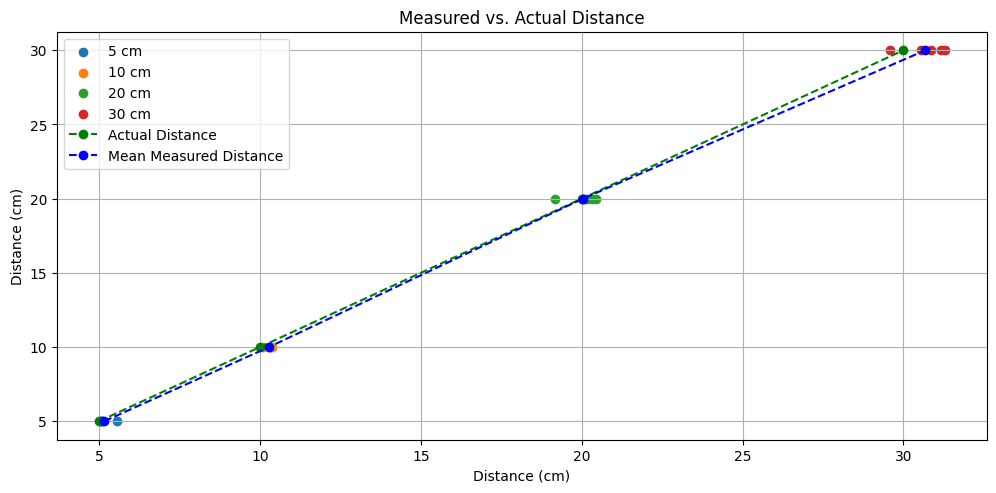

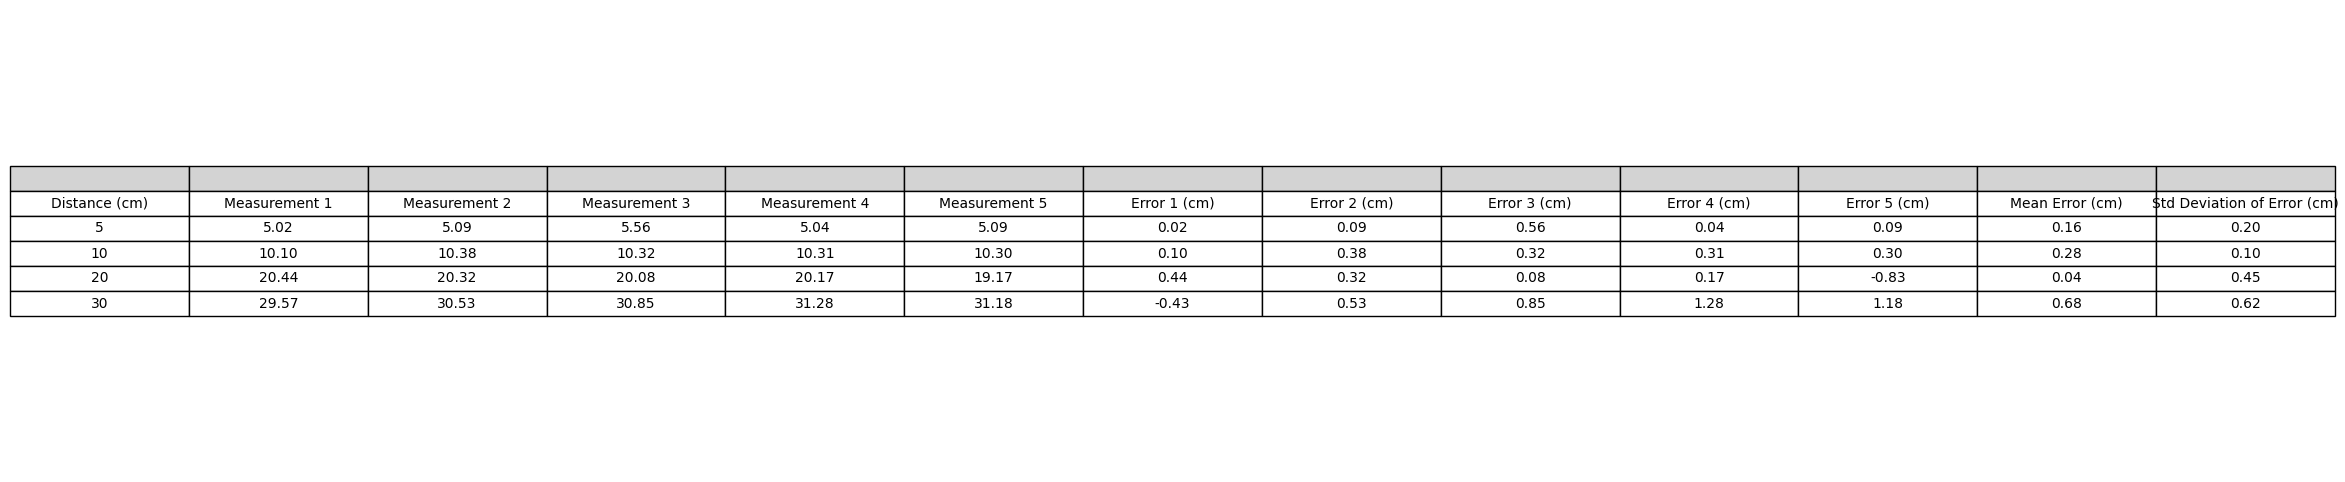

Actual Distance: 5 cm
Mean Error: 0.16 cm
Standard Deviation of Error: 0.20 cm
Errors (cm): 0.02, 0.09, 0.56, 0.04, 0.09

Actual Distance: 10 cm
Mean Error: 0.28 cm
Standard Deviation of Error: 0.10 cm
Errors (cm): 0.10, 0.38, 0.32, 0.31, 0.30

Actual Distance: 20 cm
Mean Error: 0.04 cm
Standard Deviation of Error: 0.45 cm
Errors (cm): 0.44, 0.32, 0.08, 0.17, -0.83

Actual Distance: 30 cm
Mean Error: 0.68 cm
Standard Deviation of Error: 0.62 cm
Errors (cm): -0.43, 0.53, 0.85, 1.28, 1.18



In [20]:
import numpy as np
import matplotlib.pyplot as plt

actual_distances = np.array([5, 10, 20, 30])  # Actual distances in cm
measured_distances = np.array([
    [5.02, 5.09, 5.56, 5.04, 5.09],  # Measurements for 5 cm
    [10.10, 10.38, 10.32, 10.31, 10.30],  # Measurements for 10 cm
    [20.44, 20.32, 20.08, 20.17, 19.17],  # Measurements for 20 cm
    [29.57, 30.53, 30.85, 31.28, 31.18]  # Measurements for 30 cm
])

# Calculate errors
errors = measured_distances - actual_distances[:, np.newaxis]

# Calculate mean and standard deviation of errors for each distance
mean_errors = np.mean(errors, axis=1)
std_deviation_errors = np.std(errors, axis=1)

# Create a table to display data, errors, mean error, and standard deviation
table_data = [['Distance (cm)', 'Measurement 1', 'Measurement 2', 'Measurement 3', 'Measurement 4', 'Measurement 5', 'Error 1 (cm)', 'Error 2 (cm)', 'Error 3 (cm)', 'Error 4 (cm)', 'Error 5 (cm)', 'Mean Error (cm)', 'Std Deviation of Error (cm)']]
for i, actual_distance in enumerate(actual_distances):
    row_data = [f'{actual_distance}']
    row_data.extend([f'{measurement:.2f}' for measurement in measured_distances[i]])
    row_data.extend([f'{error:.2f}' for error in errors[i]])
    row_data.append(f'{mean_errors[i]:.2f}')
    row_data.append(f'{std_deviation_errors[i]:.2f}')
    table_data.append(row_data)

# Plot measured vs. actual distance
plt.figure(figsize=(12, 6))
for i, actual_distance in enumerate(actual_distances):
    plt.scatter(measured_distances[i], [actual_distance] * 5, label=f'{actual_distance} cm', marker='o')

# Plot straight lines for actual and measured distances
plt.plot(actual_distances, actual_distances, label='Actual Distance', color='green', linestyle='--', marker='o')
plt.plot(np.mean(measured_distances, axis=1), actual_distances, label='Mean Measured Distance', color='blue', linestyle='--', marker='o')

plt.xlabel('Distance (cm)')
plt.ylabel('Distance (cm)')
plt.legend()
plt.grid()
plt.title('Measured vs. Actual Distance')

# Add some space before the table
plt.subplots_adjust(bottom=0.2)  # Adjust the value as needed

# Create the table in a separate figure
fig, ax = plt.subplots(figsize=(30, 6))
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colColours=['lightgray'] * 13)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

ax.axis('off')  # Hide the axis for the table
plt.show()

# Display mean and standard deviation of errors
for i, actual_distance in enumerate(actual_distances):
    print(f"Actual Distance: {actual_distance} cm")
    print(f"Mean Error: {mean_errors[i]:.2f} cm")
    print(f"Standard Deviation of Error: {std_deviation_errors[i]:.2f} cm")
    print(f"Errors (cm): {', '.join([f'{error:.2f}' for error in errors[i]])}\n")
